### Please Note : All 3 parts of the assignment are in this single notebook

## Part 1

#### Importing Libraries required for web scrapping and other purposes

In [1]:
import pandas as pd
import numpy as np
import csv
from bs4 import BeautifulSoup
import requests

#### Parsing data from the wiki link and using prettify to see parse tree into a nicely formatted Unicode string

In [2]:
wiki_req = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
content = BeautifulSoup(wiki_req,'lxml')
print(content.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":906439794,"wgRevisionId":906439794,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June",

#### Analyzing the parsed content to get required data

In [3]:
parsed_content = content.find('table',{'class':'wikitable sortable'})
#print(parsed_content)
print(parsed_content.tr.text)


Postcode
Borough
Neighbourhood



#### Extracting required fields namely Postcode,Borough,Neighbourhood 

In [4]:
#req_fields="Postcode,Borough,Neighbourhood"
data=""
for i in parsed_content.find_all('tr'):
    row=""
    for j in i.find_all('td'):
        row+=(","+j.text)
    data+=row[1:]
print(data)

M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M5A,Downtown Toronto,Regent Park
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Queen's Park,Not assigned
M8A,Not assigned,Not assigned
M9A,Etobicoke,Islington Avenue
M1B,Scarborough,Rouge
M1B,Scarborough,Malvern
M2B,Not assigned,Not assigned
M3B,North York,Don Mills North
M4B,East York,Woodbine Gardens
M4B,East York,Parkview Hill
M5B,Downtown Toronto,Ryerson
M5B,Downtown Toronto,Garden District
M6B,North York,Glencairn
M7B,Not assigned,Not assigned
M8B,Not assigned,Not assigned
M9B,Etobicoke,Cloverdale
M9B,Etobicoke,Islington
M9B,Etobicoke,Martin Grove
M9B,Etobicoke,Princess Gardens
M9B,Etobicoke,West Deane Park
M1C,Scarborough,Highland Creek
M1C,Scarborough,Rouge Hill
M1C,Scarborough,Port Union
M2C,Not assigned,Not assigned
M3C,North York,Flemingdon Park
M3C,North York,Don Mills South
M4C,East York,Woodbine Heights
M

#### Writing the extracted fields to a csv file

In [5]:
csv_file=open("Toronto_data.csv","wb")
#file.write(bytes(headers,encoding="ascii",errors="ignore"))
csv_file.write(bytes(data,encoding="ascii",errors="ignore"))

8738

#### Creating a pandas dataframe

In [6]:
df = pd.read_csv('Toronto_data.csv',header=None)
df.columns=["Postalcode","Borough","Neighbourhood"]
df.head(20)

,Postalcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [7]:
# Retivingindexes for which column Borough values == "Not assigned" and deleting those rows from the dataframe
indexNames = df[ df['Borough'] =='Not assigned'].index
df.drop(indexNames , inplace=True)
df.head()

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


#### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough

In [8]:
df.loc[df['Neighbourhood'] =='Not assigned' , 'Neighbourhood'] = df['Borough']
df.head()

,Postalcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


#### Merging same postal codes entries into 1 entry

In [9]:
df_2 = df.groupby(['Postalcode','Borough'], sort=False).agg( ', '.join)
df_new_joined=df_2.reset_index()
df_new_joined.head(12)

,Postalcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Harbourfront, Regent Park"
3,M6A,North York,"Lawrence Heights, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Rouge, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"Woodbine Gardens, Parkview Hill"
9,M5B,Downtown Toronto,"Ryerson, Garden District"


In [10]:
df_new_joined.shape

(103, 3)

## Part 2

#### Link to csv file that has the geographical coordinates of each postal code

In [11]:
!wget -q -O 'Toronto_long_lat_data.csv'  http://cocl.us/Geospatial_data
df_location = pd.read_csv('Toronto_long_lat_data.csv')
df_location.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


#### Getting Latitude and Longitude values for a given postal code into a dataFrame

In [12]:
df_location.columns=['Postalcode','Latitude','Longitude']
df_location.head(10)

,Postalcode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


#### Merging the dataframes one with Postal code, Borough and neighbourhood and one with Laltitude and Longitude values

In [13]:
df_merged = pd.merge(df_new_joined,
                 df_location[['Postalcode','Latitude', 'Longitude']],
                 on='Postalcode')
df_merged

,Postalcode,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
7,M3B,North York,Don Mills North,43.745906,-79.352188
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937


## Part 3

#### Importing libraries to generate maps to visualize your neighborhoods and how they cluster together

In [14]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Importing libraries is done ..............')

Importing libraries is done ..............


#### Getting co-ordinates for Torronto

In [15]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="Toronto")
location = geolocator.geocode(address)
latitude_toronto = location.latitude
longitude_toronto = location.longitude
print('The geograpical coordinates of Toronto are {}, {}.'.format(latitude_toronto, longitude_toronto))

The geograpical coordinates of Toronto are 43.653963, -79.387207.


#### Creating Folium Map of Torronto

In [16]:
map_toronto = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10)

# add markers to map
for lat, lng, borough, Neighbourhood in zip(df_merged['Latitude'], df_merged['Longitude'],
                                            df_merged['Borough'], df_merged['Neighbourhood']):
    label = '{}, {}'.format(Neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Using Foursquare api to get venues around neighbourhoods and their details

In [17]:
# defining credentials from the foursquare api
# @hidden_cell
CLIENT_ID = 'Q45W4W1VI3MF3G0YVUQXI5JBBP2E4AGSS30NAMOWS1ZKBP3Z' 
CLIENT_SECRET = 'BLRENTRTRLYPXAHUXVNRY1EWMAX0A2VNR3LL1RWM5FXRKSLD'
VERSION = '20190814'

In [18]:
# defining radius and limit for venues
radius=500
LIMIT=100

#### Defining function to get venues near neighbourhood and their corresponding values

In [19]:
def NearbyVenues(locations, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(locations, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
near_by_venues = NearbyVenues(df_merged['Neighbourhood'],
                                   df_merged['Latitude'],
                                   df_merged['Longitude']
                                  )

Parkwoods
Victoria Village
Harbourfront, Regent Park
Lawrence Heights, Lawrence Manor
Queen's Park
Islington Avenue
Rouge, Malvern
Don Mills North
Woodbine Gardens, Parkview Hill
Ryerson, Garden District
Glencairn
Cloverdale, Islington, Martin Grove, Princess Gardens, West Deane Park
Highland Creek, Rouge Hill, Port Union
Flemingdon Park, Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Bloordale Gardens, Eringate, Markland Wood, Old Burnhamthorpe
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Downsview North, Wilson Heights
Thorncliffe Park
Adelaide, King, Richmond
Dovercourt Village, Dufferin
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto
Harbourfront East, Toronto Islands, Union Station
Little Portugal, Trinity
East Birchmount Park, Ionview, Kennedy Park
Bayview Village
CFB Toronto, Downsview East
The D

In [21]:
near_by_venues.head(10)

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,TTC stop #8380,43.752672,-79.326351,Bus Stop
3,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
4,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
5,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
6,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
7,Victoria Village,43.725882,-79.315572,Eglinton Ave E & Sloane Ave/Bermondsey Rd,43.726086,-79.313620,Intersection
8,Victoria Village,43.725882,-79.315572,Cash Money,43.725486,-79.312665,Financial or Legal Service
9,"Harbourfront, Regent Park",43.654260,-79.360636,Roselle Desserts,43.653447,-79.362017,Bakery


#### Checking the number of rows and columns in the dataframe

In [22]:
near_by_venues.shape

(2235, 7)

#### Saving the Foursquare api results to a file

In [23]:
import pickle as pkl
with open('foursquare_venues_data.txt','wb') as file:   
    pkl.dump(near_by_venues, file)
    
print('Dumped data to pickle file')

Dumped data to pickle file


#### Calculating number of venues near a neighborhood

In [24]:
number_of_venues_nearby = near_by_venues[['Neighbourhood','Venue Category']].groupby('Neighbourhood').count().sort_values(['Venue Category'],ascending=False)

number_of_venues_nearby.columns=['Number of nearby Venues']

number_of_venues_nearby

,Number of nearby Venues
Neighbourhood,
"Adelaide, King, Richmond",100
"Chinatown, Grange Park, Kensington Market",100
St. James Town,100
"Ryerson, Garden District",100
"First Canadian Place, Underground city",100
"Design Exchange, Toronto Dominion Centre",100
"Commerce Court, Victoria Hotel",100
"Harbourfront East, Toronto Islands, Union Station",100
Stn A PO Boxes 25 The Esplanade,96


#### Picking top 20 neigbourhoods based on number of nearby venues

In [25]:
top_20 = number_of_venues_nearby[:20].reset_index()
top_20

,Neighbourhood,Number of nearby Venues
0,"Adelaide, King, Richmond",100
1,"Chinatown, Grange Park, Kensington Market",100
2,St. James Town,100
3,"Ryerson, Garden District",100
4,"First Canadian Place, Underground city",100
5,"Design Exchange, Toronto Dominion Centre",100
6,"Commerce Court, Victoria Hotel",100
7,"Harbourfront East, Toronto Islands, Union Station",100
8,Stn A PO Boxes 25 The Esplanade,96
9,Central Bay Street,84


#### Exploratory Analysis based on numbers

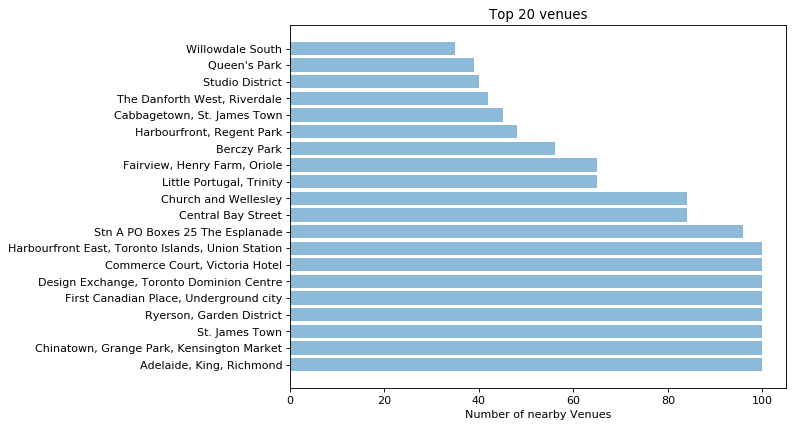

In [27]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

y = top_20['Number of nearby Venues']
x = top_20['Neighbourhood']

plt.barh(x, y, align='center', alpha=0.5)

plt.xlabel('Number of nearby Venues')
plt.title('Top 20 venues')

plt.show()

# Neighbourhood Analysis

In [28]:
# Using pandas dummies to convert categorical values to numeric a.k.a. One Hot Encoding
df = pd.get_dummies(near_by_venues[['Venue Category']])
df.index = near_by_venues['Neighbourhood']
df = df.reset_index()
df.head()

,Neighbourhood,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,...,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkwoods,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Using mean to determine the distribution of neighbourhoods by category

In [29]:
df_req = df.groupby('Neighbourhood').mean().reset_index()
df_req

,Neighbourhood,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,...,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,"Adelaide, King, Richmond",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.030000,0.000000,...,0.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.0,0.01,0.000000
1,Agincourt,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
2,"Agincourt North, L'Amoreaux East, Milliken, St...",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
4,"Alderwood, Long Branch",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
5,"Bathurst Manor, Downsview North, Wilson Heights",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.0,0.00,0.000000
6,Bayview Village,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
7,"Bedford Park, Lawrence Manor East",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.045455,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
8,Berczy Park,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000
9,"Birch Cliff, Cliffside West",0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.000000


### Top 10 venues for each neighbourhood

In [30]:
num_top_venues = 10

for i in df_req['Neighbourhood']:
    new_val = df_req[df_req['Neighbourhood'] == i].T.reset_index()
    new_val.columns = ['Venue','frequency']
    new_val = new_val.iloc[1:]
    new_val['frequency'] = new_val['frequency'].astype(float)
    new_val = new_val.round({'frequency': 2})
    print(i)
    print(new_val.sort_values('frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Adelaide, King, Richmond
                                Venue  frequency
0          Venue Category_Coffee Shop       0.08
1                 Venue Category_Café       0.05
2                  Venue Category_Bar       0.04
3           Venue Category_Steakhouse       0.04
4      Venue Category_Thai Restaurant       0.04
5       Venue Category_Breakfast Spot       0.03
6  Venue Category_American Restaurant       0.03
7                Venue Category_Hotel       0.03
8                  Venue Category_Gym       0.03
9           Venue Category_Restaurant       0.03


Agincourt
                                            Venue  frequency
0                   Venue Category_Breakfast Spot       0.25
1                           Venue Category_Lounge       0.25
2                   Venue Category_Clothing Store       0.25
3                     Venue Category_Skating Rink       0.25
4               Venue Category_Miscellaneous Shop       0.00
5                    Venue Category_Movie Theater       0.

Caledonia-Fairbanks
                                            Venue  frequency
0                             Venue Category_Park        0.4
1                           Venue Category_Market        0.2
2                    Venue Category_Women's Store        0.2
3             Venue Category_Fast Food Restaurant        0.2
4               Venue Category_Mexican Restaurant        0.0
5              Venue Category_Monument / Landmark        0.0
6  Venue Category_Molecular Gastronomy Restaurant        0.0
7       Venue Category_Modern European Restaurant        0.0
8               Venue Category_Miscellaneous Shop        0.0
9        Venue Category_Middle Eastern Restaurant        0.0


Canada Post Gateway Processing Centre
                                      Venue  frequency
0                      Venue Category_Hotel       0.18
1                Venue Category_Coffee Shop       0.18
2  Venue Category_Middle Eastern Restaurant       0.09
3        Venue Category_Fried Chicken Joint      

Del Ray, Keelesdale, Mount Dennis, Silverthorn
                                            Venue  frequency
0                   Venue Category_Discount Store       0.33
1             Venue Category_Fast Food Restaurant       0.33
2                   Venue Category_Sandwich Place       0.33
3               Venue Category_Miscellaneous Shop       0.00
4                    Venue Category_Movie Theater       0.00
5                            Venue Category_Motel       0.00
6              Venue Category_Monument / Landmark       0.00
7  Venue Category_Molecular Gastronomy Restaurant       0.00
8       Venue Category_Modern European Restaurant       0.00
9                Venue Category_Accessories Store       0.00


Design Exchange, Toronto Dominion Centre
                               Venue  frequency
0         Venue Category_Coffee Shop       0.12
1                Venue Category_Café       0.08
2               Venue Category_Hotel       0.06
3          Venue Category_Restaurant       0.05

Flemingdon Park, Don Mills South
                                  Venue  frequency
0             Venue Category_Beer Store       0.10
1            Venue Category_Coffee Shop       0.10
2                    Venue Category_Gym       0.10
3  Venue Category_General Entertainment       0.05
4       Venue Category_Asian Restaurant       0.05
5         Venue Category_Clothing Store       0.05
6            Venue Category_Supermarket       0.05
7             Venue Category_Restaurant       0.05
8              Venue Category_Bike Shop       0.05
9    Venue Category_Japanese Restaurant       0.05


Forest Hill North, Forest Hill West
                                            Venue  frequency
0                    Venue Category_Jewelry Store       0.25
1                         Venue Category_Bus Line       0.25
2                 Venue Category_Sushi Restaurant       0.25
3                            Venue Category_Trail       0.25
4                Venue Category_Accessories Store       0.00
5 

Humewood-Cedarvale
                                            Venue  frequency
0                            Venue Category_Trail       0.25
1                            Venue Category_Field       0.25
2                     Venue Category_Hockey Arena       0.25
3                             Venue Category_Park       0.25
4                Venue Category_Accessories Store       0.00
5                            Venue Category_Motel       0.00
6              Venue Category_Monument / Landmark       0.00
7  Venue Category_Molecular Gastronomy Restaurant       0.00
8       Venue Category_Modern European Restaurant       0.00
9               Venue Category_Miscellaneous Shop       0.00


Kingsview Village, Martin Grove Gardens, Richview Gardens, St. Phillips
                                            Venue  frequency
0                      Venue Category_Pizza Place       0.33
1                         Venue Category_Bus Line       0.33
2                             Venue Category_Park    

Roselawn
                                            Venue  frequency
0                           Venue Category_Garden        1.0
1                Venue Category_Accessories Store        0.0
2        Venue Category_Middle Eastern Restaurant        0.0
3                            Venue Category_Motel        0.0
4              Venue Category_Monument / Landmark        0.0
5  Venue Category_Molecular Gastronomy Restaurant        0.0
6       Venue Category_Modern European Restaurant        0.0
7               Venue Category_Miscellaneous Shop        0.0
8               Venue Category_Mexican Restaurant        0.0
9                 Venue Category_Malay Restaurant        0.0


Rouge, Malvern
                                            Venue  frequency
0             Venue Category_Fast Food Restaurant        1.0
1                Venue Category_Accessories Store        0.0
2               Venue Category_Mexican Restaurant        0.0
3                            Venue Category_Motel        0.

Willowdale South
                                      Venue  frequency
0           Venue Category_Ramen Restaurant       0.09
1                Venue Category_Coffee Shop       0.09
2                       Venue Category_Café       0.06
3                Venue Category_Pizza Place       0.06
4             Venue Category_Sandwich Place       0.06
5                 Venue Category_Restaurant       0.06
6              Venue Category_Movie Theater       0.03
7  Venue Category_Middle Eastern Restaurant       0.03
8                  Venue Category_Juice Bar       0.03
9           Venue Category_Sushi Restaurant       0.03


Willowdale West
                                            Venue  frequency
0                         Venue Category_Pharmacy        0.2
1                      Venue Category_Coffee Shop        0.2
2                      Venue Category_Pizza Place        0.2
3                   Venue Category_Discount Store        0.2
4                          Venue Category_Butcher      

In [31]:
def most_visited_venues(value,num_top_venues):
    category = value.iloc[1:]
    category_desc = category.sort_values(ascending=False)
    temp=category_desc.index.values[0:num_top_venues]
    result=[] 
    for i in range(len(temp)):
        i = temp[i].split('_')
        result.append(i[1])
    return result

In [32]:
num_top_venues = 10

req_columns = ['Neighbourhood']

for i in range(num_top_venues):
    req_columns.append('Rank {}'.format(i+1))


neighbourhoods_with_top_venues = pd.DataFrame(columns=req_columns)
neighbourhoods_with_top_venues['Neighbourhood'] = df_req['Neighbourhood']

for i in np.arange(df_req.shape[0]):
    #print(i)
    neighbourhoods_with_top_venues.iloc[i, 1:] = most_visited_venues(df_req.iloc[i, :],num_top_venues)

neighbourhoods_with_top_venues.head()

,Neighbourhood,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Breakfast Spot,Hotel,Restaurant,American Restaurant,Gym
1,Agincourt,Breakfast Spot,Clothing Store,Lounge,Skating Rink,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Yoga Studio,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Coffee Shop,Discount Store,Japanese Restaurant,Sandwich Place,Beer Store,Fried Chicken Joint,Pizza Place,Pharmacy,Fast Food Restaurant
4,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Pharmacy,Sandwich Place,Coffee Shop,Pub,Pool,Dog Run,Diner


### Creating data to be fit and used for K - Means Analysis

In [33]:
X = df_req.drop('Neighbourhood', 1)
X = X.dropna()
print(X.shape)

X.head()

(100, 273)


,Venue Category_Accessories Store,Venue Category_Afghan Restaurant,Venue Category_Airport,Venue Category_Airport Food Court,Venue Category_Airport Lounge,Venue Category_Airport Service,Venue Category_Airport Terminal,Venue Category_American Restaurant,Venue Category_Antique Shop,Venue Category_Aquarium,...,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Video Game Store,Venue Category_Video Store,Venue Category_Vietnamese Restaurant,Venue Category_Warehouse Store,Venue Category_Wine Bar,Venue Category_Wings Joint,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,...,0.0,0.01,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0


## Determining number of clusters to use

Text(0,0.5,'Sum of squared distance')

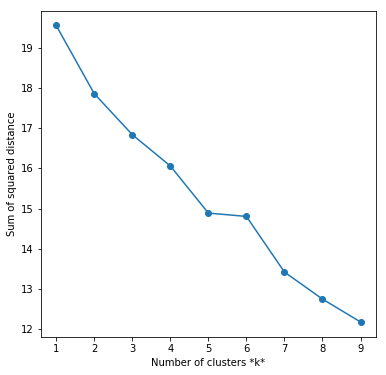

In [34]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')

### From the above figure it is evident that at k = 5 is optimum for Clustering the data.
### Hence use k = 5 

In [35]:
# Using number of clusters == 5
num_clusters = 5

# k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(X)

# cluster labels generated

labels_of_clusters = kmeans.labels_ 

labels_of_clusters

array([1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

In [36]:
# add clustering labels

neighbourhoods_with_top_venues.insert(0, 'Cluster Labels', labels_of_clusters)
entire_data = df_merged.join(neighbourhoods_with_top_venues.set_index('Neighbourhood'), on='Neighbourhood')
entire_data

,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Fast Food Restaurant,Park,Bus Stop,Food & Drink Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Discount Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Coffee Shop,Financial or Legal Service,Hockey Arena,Intersection,Portuguese Restaurant,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1.0,Coffee Shop,Park,Pub,Café,Bakery,Breakfast Spot,Theater,Mexican Restaurant,Ice Cream Shop,French Restaurant
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,1.0,Furniture / Home Store,Event Space,Miscellaneous Shop,Clothing Store,Arts & Crafts Store,Coffee Shop,Accessories Store,Vietnamese Restaurant,Boutique,Women's Store
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,1.0,Coffee Shop,Park,Gym,Diner,Persian Restaurant,Smoothie Shop,Seafood Restaurant,Burger Joint,Sandwich Place,Burrito Place
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3.0,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
7,M3B,North York,Don Mills North,43.745906,-79.352188,1.0,Caribbean Restaurant,Gym / Fitness Center,Japanese Restaurant,Café,Baseball Field,Dumpling Restaurant,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,1.0,Fast Food Restaurant,Pizza Place,Pet Store,Athletics & Sports,Gastropub,Intersection,Pharmacy,Breakfast Spot,Bank,Gym / Fitness Center
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1.0,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Restaurant,Bookstore,Japanese Restaurant,Diner,Ice Cream Shop


#### Dropping empty values and converting labels to integer

In [37]:
entire_data=entire_data.dropna()
entire_data['Cluster Labels'] = entire_data['Cluster Labels'].astype(int)
entire_data

/Users/navaneeth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Postalcode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,M3A,North York,Parkwoods,43.753259,-79.329656,0,Fast Food Restaurant,Park,Bus Stop,Food & Drink Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Discount Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,Coffee Shop,Financial or Legal Service,Hockey Arena,Intersection,Portuguese Restaurant,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
2,M5A,Downtown Toronto,"Harbourfront, Regent Park",43.654260,-79.360636,1,Coffee Shop,Park,Pub,Café,Bakery,Breakfast Spot,Theater,Mexican Restaurant,Ice Cream Shop,French Restaurant
3,M6A,North York,"Lawrence Heights, Lawrence Manor",43.718518,-79.464763,1,Furniture / Home Store,Event Space,Miscellaneous Shop,Clothing Store,Arts & Crafts Store,Coffee Shop,Accessories Store,Vietnamese Restaurant,Boutique,Women's Store
4,M7A,Queen's Park,Queen's Park,43.662301,-79.389494,1,Coffee Shop,Park,Gym,Diner,Persian Restaurant,Smoothie Shop,Seafood Restaurant,Burger Joint,Sandwich Place,Burrito Place
6,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,3,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
7,M3B,North York,Don Mills North,43.745906,-79.352188,1,Caribbean Restaurant,Gym / Fitness Center,Japanese Restaurant,Café,Baseball Field,Dumpling Restaurant,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
8,M4B,East York,"Woodbine Gardens, Parkview Hill",43.706397,-79.309937,1,Fast Food Restaurant,Pizza Place,Pet Store,Athletics & Sports,Gastropub,Intersection,Pharmacy,Breakfast Spot,Bank,Gym / Fitness Center
9,M5B,Downtown Toronto,"Ryerson, Garden District",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Restaurant,Bookstore,Japanese Restaurant,Diner,Ice Cream Shop
10,M6B,North York,Glencairn,43.709577,-79.445073,0,Park,Japanese Restaurant,Asian Restaurant,Pub,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore


In [38]:
# create map
map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters)
ys = [i + x + (i*x)**2 for i in range(num_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(entire_data['Latitude'], entire_data['Longitude'], entire_data['Neighbourhood'], entire_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Analyze Clusters

### Cluster 1

In [39]:
entire_data.loc[entire_data['Cluster Labels'] == 0, entire_data.columns[[1] + 
                                                             list(range(5, entire_data.shape[1]))]]


,Borough,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,North York,0,Fast Food Restaurant,Park,Bus Stop,Food & Drink Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Discount Store
10,North York,0,Park,Japanese Restaurant,Asian Restaurant,Pub,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
16,York,0,Park,Field,Hockey Arena,Trail,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore
21,York,0,Park,Fast Food Restaurant,Women's Store,Market,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
35,East York,0,Park,Pizza Place,Convenience Store,Yoga Studio,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
46,North York,0,Grocery Store,Park,Bank,Shopping Mall,Hotel,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop
49,North York,0,Park,Construction & Landscaping,Bakery,Basketball Court,Yoga Studio,Electronics Store,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
61,Central Toronto,0,Park,Swim School,Bus Line,Yoga Studio,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
64,York,0,Park,Convenience Store,Yoga Studio,Electronics Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
66,North York,0,Park,Bank,Convenience Store,Yoga Studio,Electronics Store,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


In [47]:
len(entire_data.loc[entire_data['Cluster Labels'] == 0, entire_data.columns[[1] + 
                                                             list(range(5, entire_data.shape[1]))]])

13

### Cluster 2

In [40]:
entire_data.loc[entire_data['Cluster Labels'] == 1, entire_data.columns[[1] + 
                                                             list(range(5, entire_data.shape[1]))]]


,Borough,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
1,North York,1,Coffee Shop,Financial or Legal Service,Hockey Arena,Intersection,Portuguese Restaurant,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
2,Downtown Toronto,1,Coffee Shop,Park,Pub,Café,Bakery,Breakfast Spot,Theater,Mexican Restaurant,Ice Cream Shop,French Restaurant
3,North York,1,Furniture / Home Store,Event Space,Miscellaneous Shop,Clothing Store,Arts & Crafts Store,Coffee Shop,Accessories Store,Vietnamese Restaurant,Boutique,Women's Store
4,Queen's Park,1,Coffee Shop,Park,Gym,Diner,Persian Restaurant,Smoothie Shop,Seafood Restaurant,Burger Joint,Sandwich Place,Burrito Place
7,North York,1,Caribbean Restaurant,Gym / Fitness Center,Japanese Restaurant,Café,Baseball Field,Dumpling Restaurant,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
8,East York,1,Fast Food Restaurant,Pizza Place,Pet Store,Athletics & Sports,Gastropub,Intersection,Pharmacy,Breakfast Spot,Bank,Gym / Fitness Center
9,Downtown Toronto,1,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Restaurant,Bookstore,Japanese Restaurant,Diner,Ice Cream Shop
12,Scarborough,1,History Museum,Bar,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
13,North York,1,Gym,Beer Store,Coffee Shop,Asian Restaurant,Sandwich Place,Bike Shop,Sporting Goods Shop,Supermarket,Japanese Restaurant,Italian Restaurant
14,East York,1,Skating Rink,Curling Ice,Park,Pharmacy,Bus Stop,Video Store,Cosmetics Shop,Beer Store,Yoga Studio,Doner Restaurant


### Cluster 3

In [41]:
entire_data.loc[entire_data['Cluster Labels'] == 2, entire_data.columns[[1] + 
                                                             list(range(5, entire_data.shape[1]))]]


,Borough,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
11,Etobicoke,2,Bank,Yoga Studio,Eastern European Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store,Filipino Restaurant
39,North York,2,Café,Chinese Restaurant,Bank,Japanese Restaurant,Yoga Studio,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


### Cluster 4

In [42]:
entire_data.loc[entire_data['Cluster Labels'] == 3, entire_data.columns[[1] + 
                                                             list(range(5, entire_data.shape[1]))]]


,Borough,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
6,Scarborough,3,Fast Food Restaurant,Yoga Studio,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store


### Cluster 5

In [43]:
entire_data.loc[entire_data['Cluster Labels'] == 4, entire_data.columns[[1] + 
                                                             list(range(5, entire_data.shape[1]))]]

,Borough,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
32,Scarborough,4,Playground,Yoga Studio,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Electronics Store
40,North York,4,Park,Airport,Playground,Yoga Studio,Eastern European Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
85,Scarborough,4,Playground,Park,Yoga Studio,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore


### Finding the best neighbourhood

In [44]:
neighbourhoods_with_top_venues

,Cluster Labels,Neighbourhood,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,1,"Adelaide, King, Richmond",Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Breakfast Spot,Hotel,Restaurant,American Restaurant,Gym
1,1,Agincourt,Breakfast Spot,Clothing Store,Lounge,Skating Rink,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
2,4,"Agincourt North, L'Amoreaux East, Milliken, St...",Playground,Park,Yoga Studio,Dumpling Restaurant,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore
3,1,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Coffee Shop,Discount Store,Japanese Restaurant,Sandwich Place,Beer Store,Fried Chicken Joint,Pizza Place,Pharmacy,Fast Food Restaurant
4,1,"Alderwood, Long Branch",Pizza Place,Gym,Skating Rink,Pharmacy,Sandwich Place,Coffee Shop,Pub,Pool,Dog Run,Diner
5,1,"Bathurst Manor, Downsview North, Wilson Heights",Coffee Shop,Shopping Mall,Supermarket,Sushi Restaurant,Bank,Middle Eastern Restaurant,Restaurant,Bridal Shop,Fried Chicken Joint,Frozen Yogurt Shop
6,2,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Yoga Studio,Dog Run,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant
7,1,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Grocery Store,Thai Restaurant,Liquor Store,Fast Food Restaurant,Sandwich Place,Juice Bar,Butcher,Café
8,1,Berczy Park,Coffee Shop,Cocktail Bar,Café,Steakhouse,Farmers Market,Cheese Shop,Beer Bar,Seafood Restaurant,Bakery,Fish Market
9,1,"Birch Cliff, Cliffside West",College Stadium,Café,General Entertainment,Skating Rink,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant


In [45]:
top_20

,Neighbourhood,Number of nearby Venues
0,"Adelaide, King, Richmond",100
1,"Chinatown, Grange Park, Kensington Market",100
2,St. James Town,100
3,"Ryerson, Garden District",100
4,"First Canadian Place, Underground city",100
5,"Design Exchange, Toronto Dominion Centre",100
6,"Commerce Court, Victoria Hotel",100
7,"Harbourfront East, Toronto Islands, Union Station",100
8,Stn A PO Boxes 25 The Esplanade,96
9,Central Bay Street,84


In [46]:
best_neighbourhood = top_20.join(neighbourhoods_with_top_venues.set_index('Neighbourhood'), on='Neighbourhood')
best_neighbourhood

,Neighbourhood,Number of nearby Venues,Cluster Labels,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6,Rank 7,Rank 8,Rank 9,Rank 10
0,"Adelaide, King, Richmond",100,1,Coffee Shop,Café,Thai Restaurant,Bar,Steakhouse,Breakfast Spot,Hotel,Restaurant,American Restaurant,Gym
1,"Chinatown, Grange Park, Kensington Market",100,1,Café,Vegetarian / Vegan Restaurant,Chinese Restaurant,Mexican Restaurant,Bakery,Vietnamese Restaurant,Dumpling Restaurant,Bar,Coffee Shop,Park
2,St. James Town,100,1,Café,Hotel,Coffee Shop,Restaurant,Italian Restaurant,Gastropub,Cosmetics Shop,Beer Bar,Bakery,Breakfast Spot
3,"Ryerson, Garden District",100,1,Coffee Shop,Clothing Store,Cosmetics Shop,Middle Eastern Restaurant,Café,Restaurant,Bookstore,Japanese Restaurant,Diner,Ice Cream Shop
4,"First Canadian Place, Underground city",100,1,Coffee Shop,Café,Hotel,Restaurant,Steakhouse,Bar,Seafood Restaurant,American Restaurant,Gym,Gastropub
5,"Design Exchange, Toronto Dominion Centre",100,1,Coffee Shop,Café,Hotel,Restaurant,Bakery,Gastropub,Gym,Italian Restaurant,Bar,American Restaurant
6,"Commerce Court, Victoria Hotel",100,1,Coffee Shop,Hotel,Café,American Restaurant,Restaurant,Gastropub,Bakery,Deli / Bodega,Steakhouse,Gym
7,"Harbourfront East, Toronto Islands, Union Station",100,1,Coffee Shop,Hotel,Aquarium,Café,Italian Restaurant,Sporting Goods Shop,Bakery,Brewery,Scenic Lookout,Pizza Place
8,Stn A PO Boxes 25 The Esplanade,96,1,Coffee Shop,Restaurant,Café,Seafood Restaurant,Italian Restaurant,Cocktail Bar,Beer Bar,Hotel,Bakery,Creperie
9,Central Bay Street,84,1,Coffee Shop,Ice Cream Shop,Italian Restaurant,Café,Sandwich Place,Burger Joint,Indian Restaurant,Spa,Salad Place,Bar


## Based on top 20 entries:

### The best neighbourhood could be any one from the top 8 entries.
### But based on the variety and of-course the case provided it 
### would be 'Harbourfront East, Toronto Islands, Union Station' 